In [1]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
import spacy.en
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
import seaborn as sns
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
nlp = spacy.en.English()

In [3]:
convention_df = st.SampleCorpora.ConventionData2012.get_data()

In [4]:
corpus = st.CorpusFromPandas(convention_df, category_col='party', text_col='text', nlp=nlp).build()

In [5]:
from scattertext import termscoring
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Scaled F-Score'] = corpus.get_scaled_f_scores('democrat')
term_freq_df['Rudder Score'] = corpus.get_rudder_scores('democrat')
term_freq_df['Log Odds Prior'] = st.LogOddsRatioUninformativeDirichletPrior().get_p_vals(term_freq_df[['democrat freq', 'republican freq']].values)

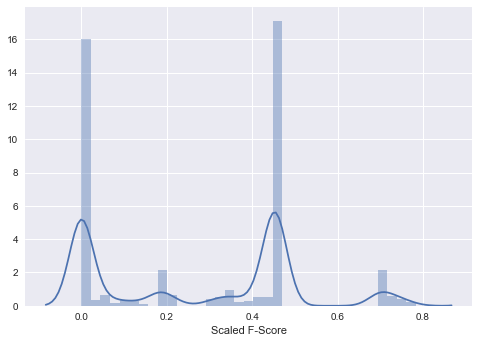

In [6]:
sns.distplot(term_freq_df['Scaled F-Score'])

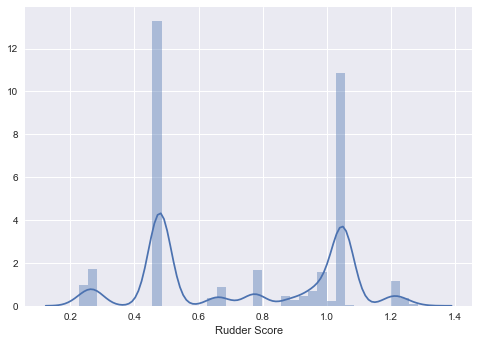

In [7]:
sns.distplot(term_freq_df['Rudder Score'])

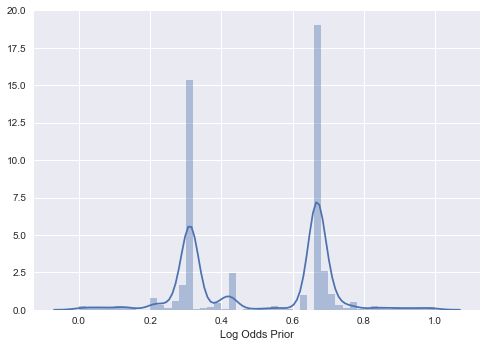

In [8]:
sns.distplot(term_freq_df['Log Odds Prior'])